In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4
import json
import pandas as pd

from os import listdir


def simplePlot(df, name):
## plot with no filters

    cm="plasma"
    fig,ax = plt.subplots(figsize=(12,10))
    plt.scatter(x=df['x'], y=df['y'], c=df['elev'], marker='.', s=100, cmap=cm, vmax=2000)
    bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1000, vmax=2000), cmap=cm))
    bar.set_label(',Elevation in metres')

    # add plot title
    plt.title('{} gridded product with 3 months of data and 2km resolution. March 2011'.format(name))
    ax.set_xlabel("X Coordinate (km)")
    ax.set_ylabel("Y Coordinate (km)")

    def format_func(value, tick_number):
        return "{}".format(int(value/1000))
        
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    plt.show()
    return fig

def load_df( filePath ):
    nc = netCDF4.Dataset(filePath)

    x = nc.variables["x"][:]
    y = nc.variables["y"][:]

    e = nc.variables['elevation']
    matrix = e[:,:,:]

    xs = []
    ys = []
    elevs = []

    for i in range(0,len(x)):
        for j in range(0,len(y)):
            xs.append(x[i])
            ys.append(y[j])
            elevs.append(matrix[0,i,j])
    nc.close()


    data = pd.DataFrame()

    data['x'] = xs
    data['y'] = ys
    data['elev'] = elevs
    return data
    
def gridfiles( cell_path, min_x, max_x, min_y, max_y ):
    def parseDir( path ):
        toks = path.split("_")
        return (int(toks[1]),int(toks[1]) + 100000, int(toks[2]), int(toks[2])+100000,path)

    cells = [ parseDir(d) for d in listdir(cell_dir) if d.startswith("cell")]

    filtered_cells = [ path for cmin_x, cmax_x, cmin_y, cmax_y,path in cells if cmin_x >= min_x and cmax_x <= max_x and cmin_y >= min_y and cmax_y <= max_y ]
    
    gf = []
    for fc in filtered_cells:
        f = [ "{}/{}/{}".format(cell_dir,fc,f) for f in listdir( "{}/{}".format(cell_path, fc) ) if f.endswith("nc")  ]
        gf.append( f[0] ) 
    
    return gf

cell_dir = '/home/jon/data/grid/y2011/m3'



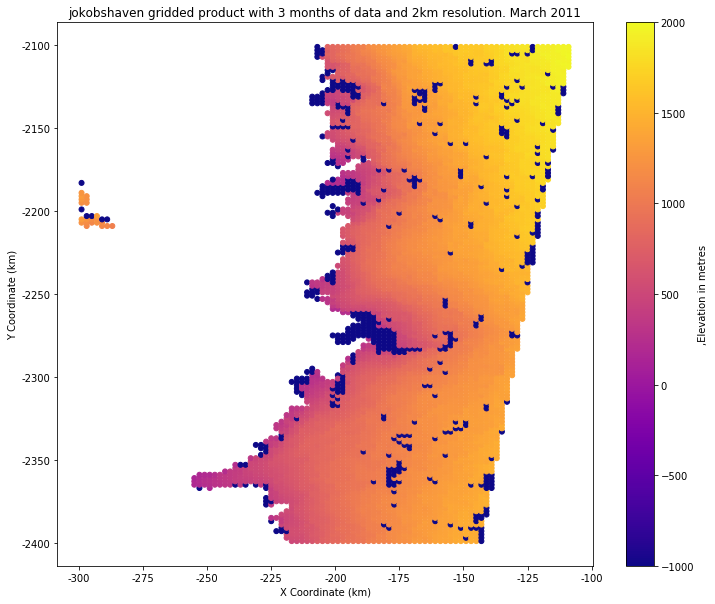

In [55]:
#Jakobshavn bbox
#minX=-262187
#maxX=-93976
#minY=-2386746
#maxY=-2144979

#Storstrommen bbox
#min_x=200000
#max_x=700000
#min_y=-1300000
#max_y=-1000000

#Jakobshavn bbox
min_x = -300000
max_x = 0
min_y = -2400000
max_y = -2100000

name = "jokobshaven"

fs = gridfiles(cell_dir, min_x, max_x, min_y, max_y)
dfs = [ load_df(gf) for gf in fs]
data = pd.concat(dfs, ignore_index=True)

res_fig = simplePlot(data, name)



In [53]:

res_fig.savefig("plots/{}_2km_Mar2011.png".format(name) )

missing = len(data[data['elev'] == -1000])
interped = len(data[data['elev'] > -1000])                   

print("missing {}".format(missing))
print("Interpped {}".format(interped))


missing 513
Interpped 5820


100 missing

1701 Interpolated

2500 total